# Random Surface Elevation

In [1]:
from steelpy import Metocean
from steelpy import Units
import matplotlib.pyplot as plt

----------------------------------------------------
                     steelpy
                 Version 0.3.3
----------------------------------------------------


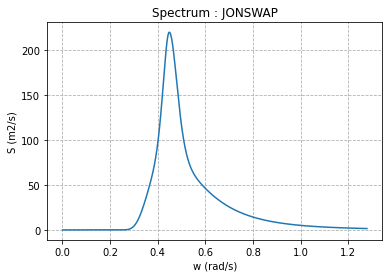

In [2]:
# ==========================================================================
# INPUT
# ==========================================================================
#
meto = Metocean()
units = Units()
# Set irregular wave module
wave = meto.iregular_waves
# Set Spectrum
sptm = wave.spectrum
jonswap = sptm.Jonswap(Hs=12.0 * units.m, Tp=14.0 * units.sec)
jonswap.plot(harmonic=1)

C:\Users\Chava\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
c:\Users\Chava\Dropbox\Python\steelpy\steelpy_05\steelpy\metocean\irregular\order2\secsurface.py:126: RuntimeWarning: invalid value encountered in true_divide
  Dmin = (((np.sqrt(Ri) - np.sqrt(Rj))


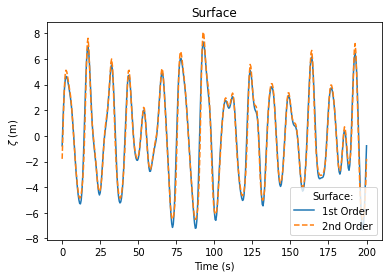

In [3]:
# ==========================================================================
# Surface Second Order (200 sec to save time)
# ==========================================================================
surface = sptm.simulation(t=200*units.sec,
                          dt=0.50*units.sec,
                          d=100*units.m,
                          wave_order=2)
surface.plot()

C:\Users\Chava\Miniconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


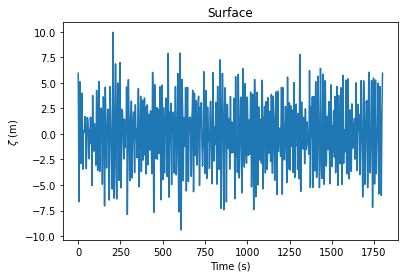

In [4]:
# ==========================================================================
# Surface Fisrt Order (1800 sec)
# ==========================================================================
# 
surface = sptm.simulation(t=1800*units.sec,
                          dt=0.50*units.sec,
                          d=100*units.m)
surface.plot()

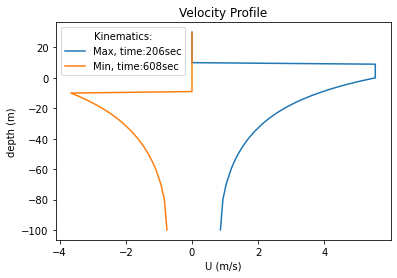

In [5]:
# ==========================================================================
# Calculate kinmatics
# ==========================================================================
#
kinematic = wave.kinematic(surface)
kinematic.plot()

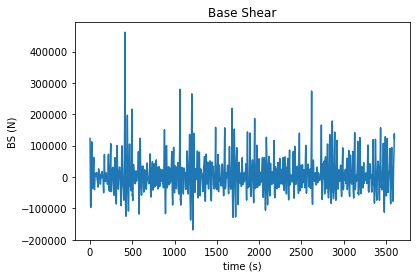

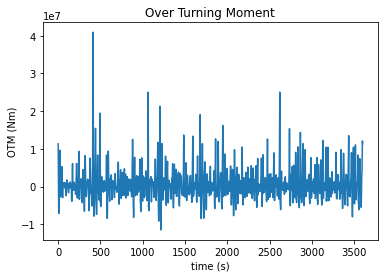

In [6]:
#==========================================================================
# Single Pile BS and OTM 
#==========================================================================
#choosing amplitude, phase and frequency
#tic
D = 1.0 * units.m
BS, OTM = wave.pile_response(D, kinematic)
#
plt.plot(BS[0])
plt.title('Base Shear')
plt.ylabel('BS (N)')
plt.xlabel('time (s)')
plt.show()
#
#
plt.plot(OTM[0])
plt.title('Over Turning Moment')
plt.ylabel('OTM (Nm)')
plt.xlabel('time (s)')
plt.show()